______________
<center>
  <h1 style="font-size: 40px; font-weight: bold">SKILLCRAFT TECHNOLOGY INTERNSHIP</h1>
</center>

______

<center>
  <h1 style="font-size: 30px; font-weight: bold">TASK 3: DECISION TREE CLASSIFIER</h1>
</center>


* **Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.**

**Intern: Aswathy S**

**Track: Data Science**

**Task Code: SCT_DS_03**
_________

___________
# **LOADING LIBRARIES**
_______

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree

___________
# **LOADING DATASET**
___________

In [2]:
df = pd.read_csv(r"C:\Users\admin\Downloads\online+shoppers+purchasing+intention+dataset\online_shoppers_intention.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
df.shape

(12330, 18)

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [6]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [9]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [10]:
df.dtypes.value_counts()

int64      7
float64    7
object     2
bool       2
Name: count, dtype: int64

In [11]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [12]:
print("Missing values in each column:\n")
print(df.isnull().sum())

Missing values in each column:

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [13]:
print("Duplicate values:")
print(df.duplicated().sum())

Duplicate values:
125


In [14]:
df.drop_duplicates(inplace=True)
df.shape

(12205, 18)

In [15]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12201,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12202,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12203,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [16]:
# Check target distribution
df['Revenue'].value_counts()

Revenue
False    10297
True      1908
Name: count, dtype: int64

In [17]:
df['Revenue'].value_counts(normalize=True) * 100

Revenue
False    84.367063
True     15.632937
Name: proportion, dtype: float64

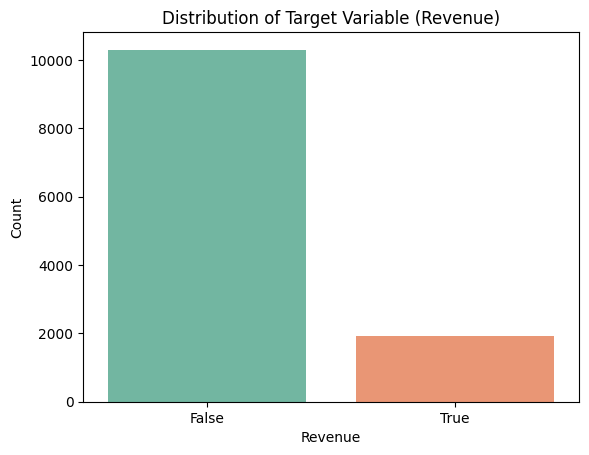

In [18]:
# Plotting the distribution of the target variable
sns.countplot(x='Revenue', data=df, palette='Set2')
plt.title('Distribution of Target Variable (Revenue)')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

___________
# Numerical Features
_____________

In [19]:
numerical_features = df.select_dtypes(include='number').columns
print("Total Numerical Features:",numerical_features.shape)
print()
print("Numeric Features:",numerical_features)

Total Numerical Features: (14,)

Numeric Features: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')


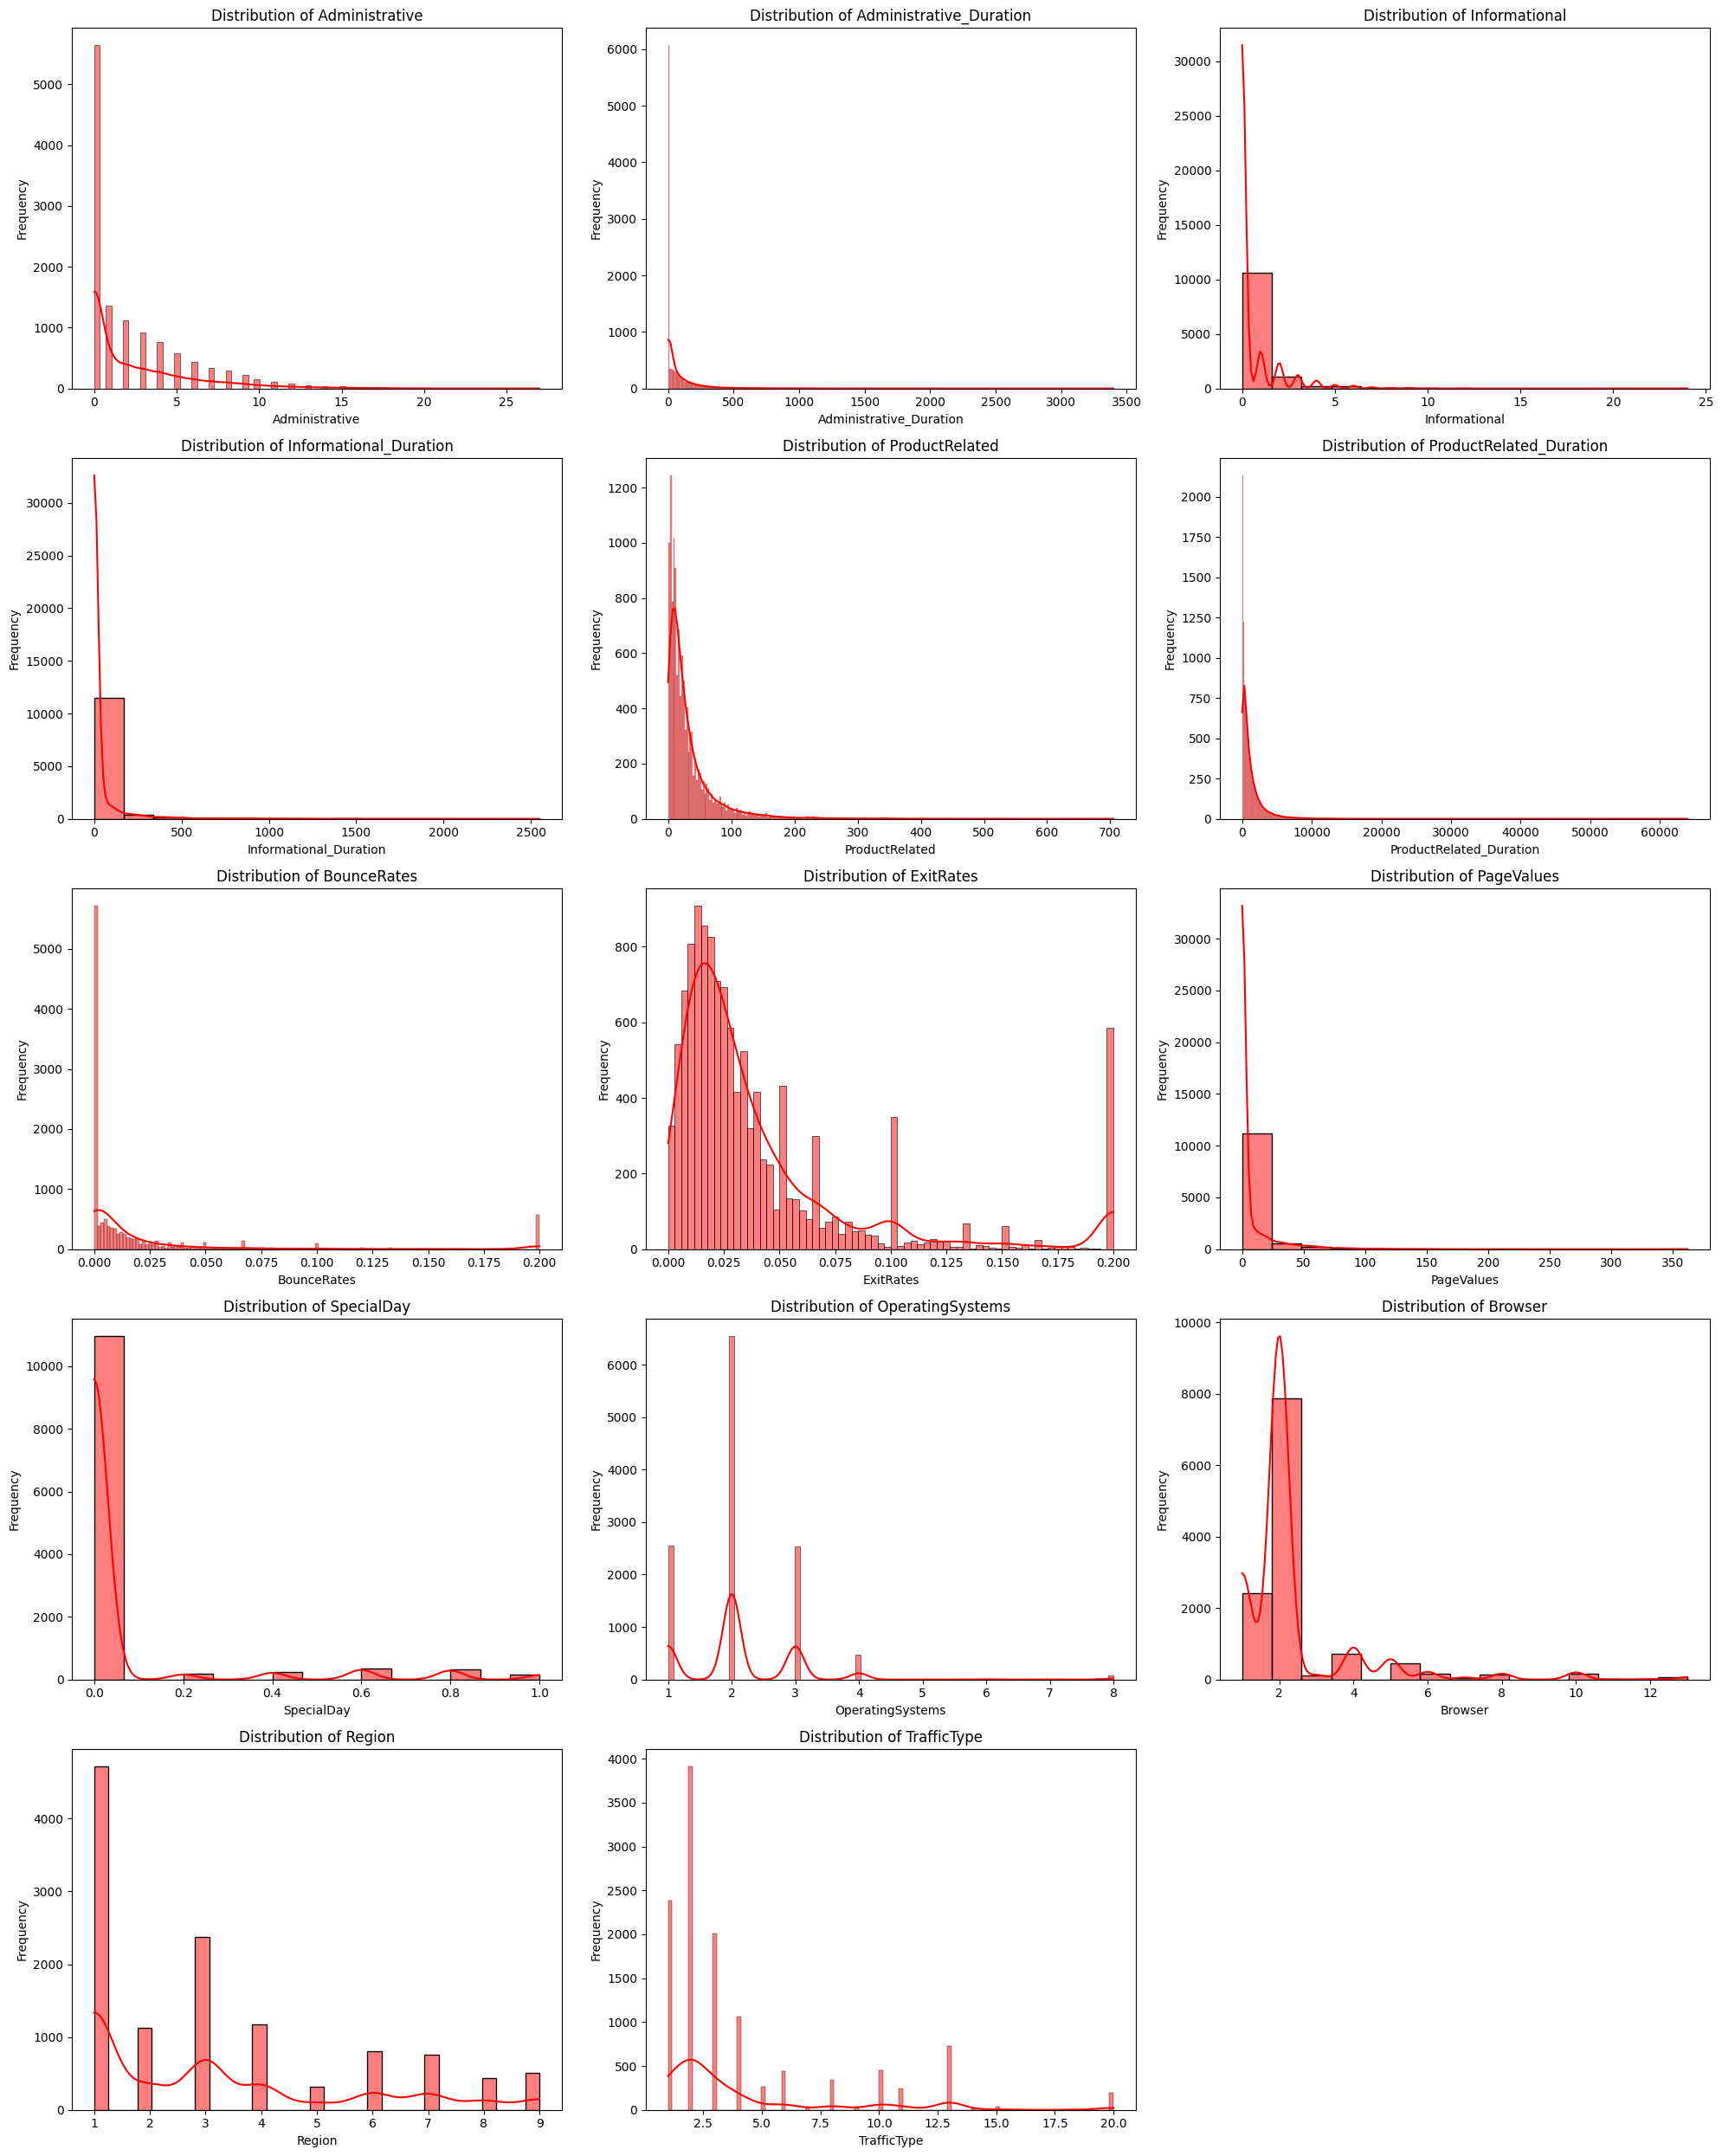

In [20]:
# Plot distributions for each numerical feature
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)  # 5 rows, 3 columns = 15 slots
    sns.histplot(df[col], kde=True, color='red')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

____________
# Outlier Detection & Handling
____________

In [21]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print(numerical_columns)

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


__________
# Skewness before outlier handling.
-----

In [22]:
skewness = df[numerical_columns].skew().sort_values(ascending=True)
print("Skewness before outlier removal or transformation:")
print(skewness)

Skewness before outlier removal or transformation:
Region                     0.978480
Administrative             1.947123
TrafficType                1.958514
OperatingSystems           2.032613
ExitRates                  2.234645
BounceRates                3.162425
Browser                    3.217404
SpecialDay                 3.285902
Informational              4.014173
ProductRelated             4.333419
Administrative_Duration    5.592152
PageValues                 6.350983
ProductRelated_Duration    7.253161
Informational_Duration     7.540291
dtype: float64


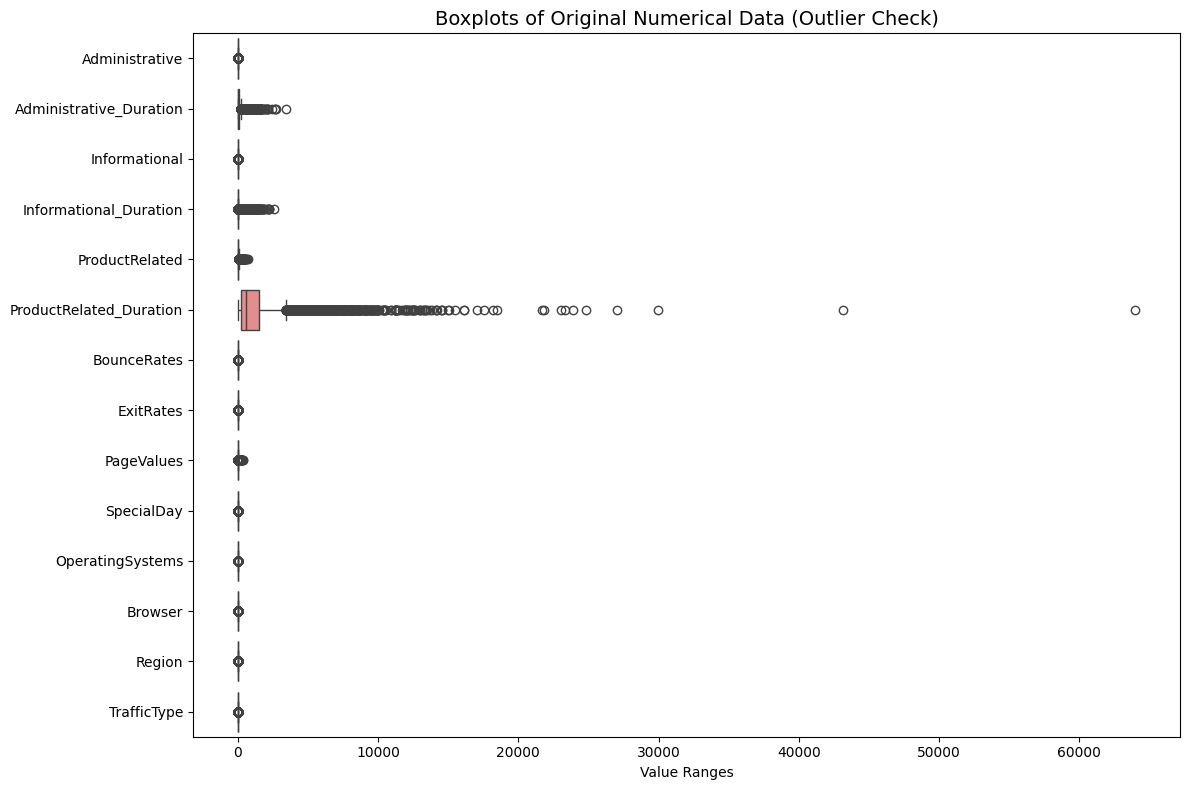

In [23]:
# Boxplots for all numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns], orient='h', color='lightcoral')
plt.title('Boxplots of Original Numerical Data (Outlier Check)', fontsize=14)
plt.xlabel('Value Ranges')
plt.tight_layout()
plt.show()

In [24]:
# Define features for which you want to remove outliers
features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
            'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

for feature in features:
    # Calculate Q1, Q3, and IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 0.5 * IQR
    upper = Q3 + 0.5 * IQR
    
    # Filter data to remove outliers for the current feature
    df_cleaned = df[(df[feature] >= lower) & (df[feature] <= upper)]

print("Dataset shape after being outliers removed:",df_cleaned.shape)
print("Dataset shape before being outliers removed:",df.shape)

Dataset shape after being outliers removed: (9638, 18)
Dataset shape before being outliers removed: (12205, 18)


In [25]:
skewness_after_outliers = df_cleaned[numerical_columns].skew().sort_values(ascending=True)
print("Skewness after outlier removal or transformation:")
print(skewness_after_outliers)

Skewness after outlier removal or transformation:
TrafficType                0.638465
Region                     0.981623
OperatingSystems           1.494288
Administrative             1.827315
ExitRates                  2.360464
Browser                    2.899184
SpecialDay                 3.400018
BounceRates                3.401322
Informational              3.551193
ProductRelated             4.073945
Administrative_Duration    5.512385
PageValues                 5.997422
ProductRelated_Duration    7.163043
Informational_Duration     7.245304
dtype: float64


________
# Skewness Transformating using yeo-johnson
__________

In [26]:
df_transformed = df.copy()

from sklearn.preprocessing import PowerTransformer

# List of highly skewed features
skewed_features = [
    'Region', 'TrafficType', 'OperatingSystems', 'Administrative',
    'ExitRates', 'Browser', 'SpecialDay', 'BounceRates',
    'Informational', 'ProductRelated', 'Administrative_Duration',
    'PageValues', 'ProductRelated_Duration', 'Informational_Duration'
]

# Apply Yeo-Johnson transformation (handles zero/negative values)
pt = PowerTransformer(method='yeo-johnson')

df_transformed[skewed_features] = pt.fit_transform(df[skewed_features])

# Check skewness after transformation
print("Skewness after Yeo-Johnson transformation:")
print(df_transformed[skewed_features].skew())

Skewness after Yeo-Johnson transformation:
Region                     0.128463
TrafficType                0.150882
OperatingSystems          -0.009848
Administrative             0.233985
ExitRates                  0.411242
Browser                   -0.001798
SpecialDay                 2.624728
BounceRates                1.011028
Informational              1.388631
ProductRelated            -0.001725
Administrative_Duration    0.133598
PageValues                 1.362402
ProductRelated_Duration   -0.021862
Informational_Duration     1.531234
dtype: float64


In [27]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  float64
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  float64
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  float64
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  float64
 12  Browser                  12205 non-null  float64
 13  Region                   12205 non-null  float64
 14  TrafficType           

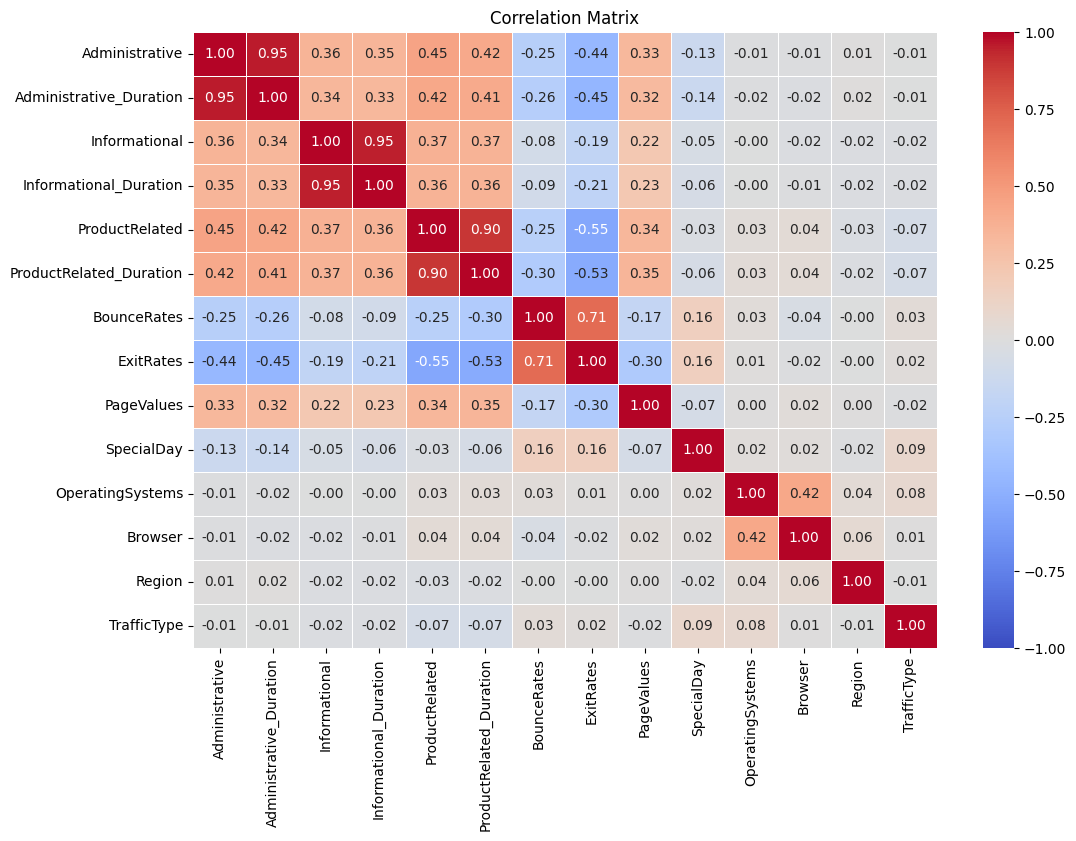

In [28]:
correlation = df_transformed[numerical_features].corr()

# Create a heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

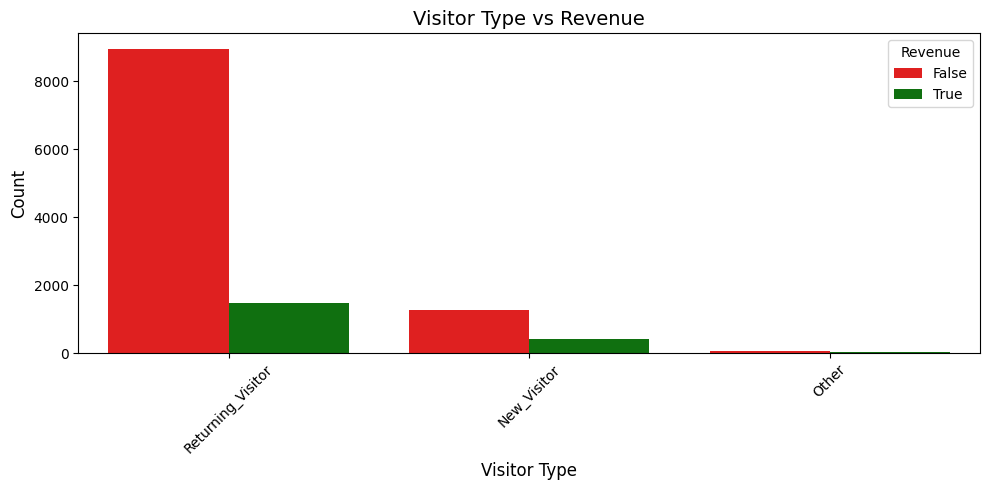

In [29]:
custom_palette = {True: 'green', False: 'red'}

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='VisitorType', hue='Revenue', palette=custom_palette)
plt.title('Visitor Type vs Revenue', fontsize=14)
plt.xlabel('Visitor Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Revenue', loc='upper right')
plt.tight_layout()
plt.show()

_________
# Categorical Columns
____________

In [30]:
categorical_features = df.select_dtypes(include='object').columns
print("Total Categorical Features:",categorical_features.shape)
print("Categorical Features:",categorical_features)

Total Categorical Features: (2,)
Categorical Features: Index(['Month', 'VisitorType'], dtype='object')


In [31]:
# Separate features
cat_data = df.select_dtypes(include="object")
bool_data = df.select_dtypes(include="bool").drop(columns='Revenue')
num_data = df.select_dtypes(include="number")

In [32]:
# 1. Convert Boolean Features to Binary
bool_data = bool_data.astype(int)

____________
# Encoding
__________

In [33]:
# 2. One-Hot Encoding for Categorical Features
cat_data_encoded = pd.get_dummies(cat_data, drop_first=True, dtype=int)

In [34]:
# 3. Combine All Encoded Features
data_encoded = pd.concat([num_data, bool_data, cat_data_encoded], axis=1)
# Display final encoded dataset shape
print("Final encoded dataset shape:", data_encoded.shape)

Final encoded dataset shape: (12205, 26)


In [35]:
bool_data.head()

,Weekend
0,0
1,0
2,0
3,0
4,1


In [36]:
cat_data_encoded.head()

,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,1,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,1


In [37]:
data_encoded

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12201,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1
12202,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1
12203,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1


In [38]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12205 non-null  int64  
 1   Administrative_Duration        12205 non-null  float64
 2   Informational                  12205 non-null  int64  
 3   Informational_Duration         12205 non-null  float64
 4   ProductRelated                 12205 non-null  int64  
 5   ProductRelated_Duration        12205 non-null  float64
 6   BounceRates                    12205 non-null  float64
 7   ExitRates                      12205 non-null  float64
 8   PageValues                     12205 non-null  float64
 9   SpecialDay                     12205 non-null  float64
 10  OperatingSystems               12205 non-null  int64  
 11  Browser                        12205 non-null  int64  
 12  Region                         12205 non-null 

In [39]:
data_encoded['Revenue'] = df['Revenue'].values
data_encoded['Revenue'].value_counts()

Revenue
False    10297
True      1908
Name: count, dtype: int64

_________
# Resampling
__________

In [40]:
# Step 1: Separate features and target
X = data_encoded.drop(columns=['Revenue'], axis=1)
y = data_encoded['Revenue']

# Step 2: Choose resampling technique
use_smote = True  # Set to False to use SMOTEENN
if use_smote:
    resampler = SMOTE(random_state=42)
else:
    resampler = SMOTEENN(random_state=42)

# Apply resampling
X_resampled, y_resampled = resampler.fit_resample(X, y)

# Convert to DataFrame (optional)
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name='Revenue')

# Combine features and target (optional)
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)


print("Original class distribution:\n", y.value_counts())
print("Resampled class distribution:\n", y_resampled_df.value_counts())

Original class distribution:
 Revenue
False    10297
True      1908
Name: count, dtype: int64
Resampled class distribution:
 Revenue
False    10297
True     10297
Name: count, dtype: int64


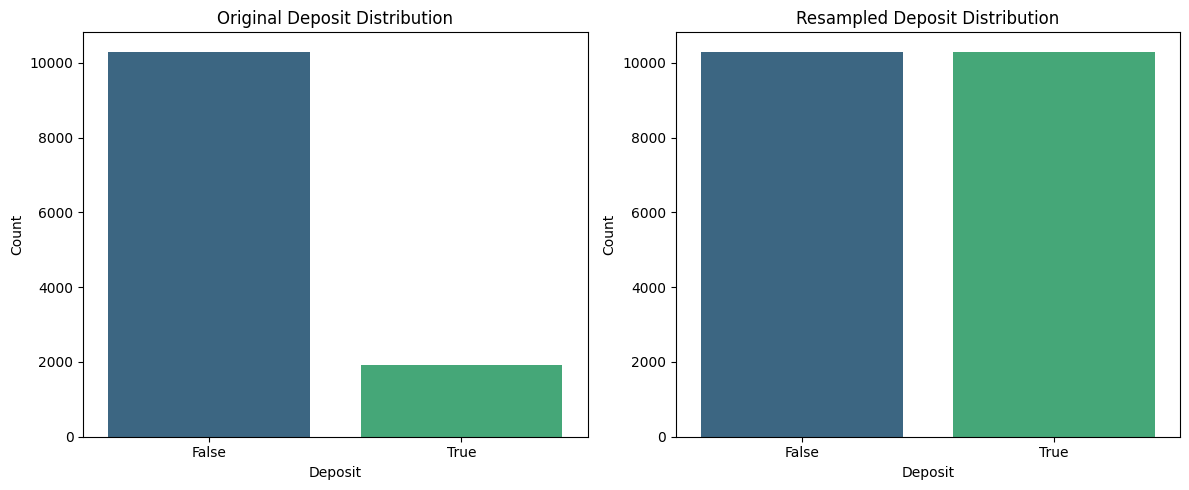

In [41]:
# Plot original vs resampled class distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original distribution
sns.barplot(x=y.value_counts().index, y=y.value_counts().values, palette="viridis", ax=axes[0])
axes[0].set_title("Original Deposit Distribution")
axes[0].set_xlabel("Deposit")
axes[0].set_ylabel("Count")

# Resampled  distribution
sns.barplot(x=y_resampled_df.value_counts().index, y=y_resampled_df.value_counts().values, palette="viridis", ax=axes[1])
axes[1].set_title("Resampled Deposit Distribution")
axes[1].set_xlabel("Deposit")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [42]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 20594 non-null  int64  
 1   Administrative_Duration        20594 non-null  float64
 2   Informational                  20594 non-null  int64  
 3   Informational_Duration         20594 non-null  float64
 4   ProductRelated                 20594 non-null  int64  
 5   ProductRelated_Duration        20594 non-null  float64
 6   BounceRates                    20594 non-null  float64
 7   ExitRates                      20594 non-null  float64
 8   PageValues                     20594 non-null  float64
 9   SpecialDay                     20594 non-null  float64
 10  OperatingSystems               20594 non-null  int64  
 11  Browser                        20594 non-null  int64  
 12  Region                         20594 non-null 

In [43]:
x = df_resampled.drop('Revenue',axis=1)  # independent variable
y = df_resampled['Revenue']              # dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(20594, 26)
(20594,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


_______
# **Train/Test Split**
__________

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15445, 26)
(5149, 26)
(15445,)
(5149,)


_____
# Model Training
________

In [45]:
def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)  
    print('Testing Score',test_score)

________
# Decision Tree Model
_______

In [46]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [47]:
mscore(dt)

Training Score 0.9130462932988022
Testing Score 0.9071664400854534


In [48]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[ True False  True ... False False False]


_______
# Evaluation
________

In [49]:
# Evaluate the model
eval_model(y_test, ypred_dt)
mscore(dt)

Accuracy_Score 0.9071664400854534
Confusion Matrix
 [[2346  249]
 [ 229 2325]]
Classification Report
               precision    recall  f1-score   support

       False       0.91      0.90      0.91      2595
        True       0.90      0.91      0.91      2554

    accuracy                           0.91      5149
   macro avg       0.91      0.91      0.91      5149
weighted avg       0.91      0.91      0.91      5149

Training Score 0.9130462932988022
Testing Score 0.9071664400854534


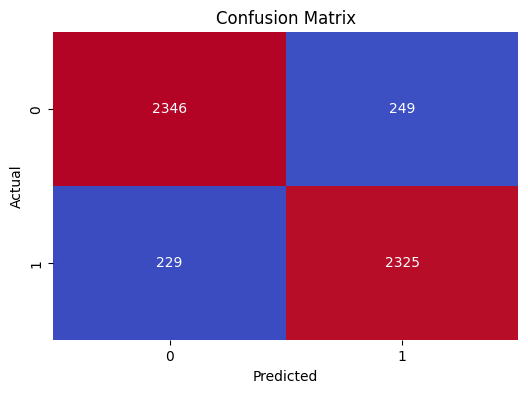

In [50]:
cm = confusion_matrix(y_test, ypred_dt)
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

__________
# Decision Tree Visualization
____

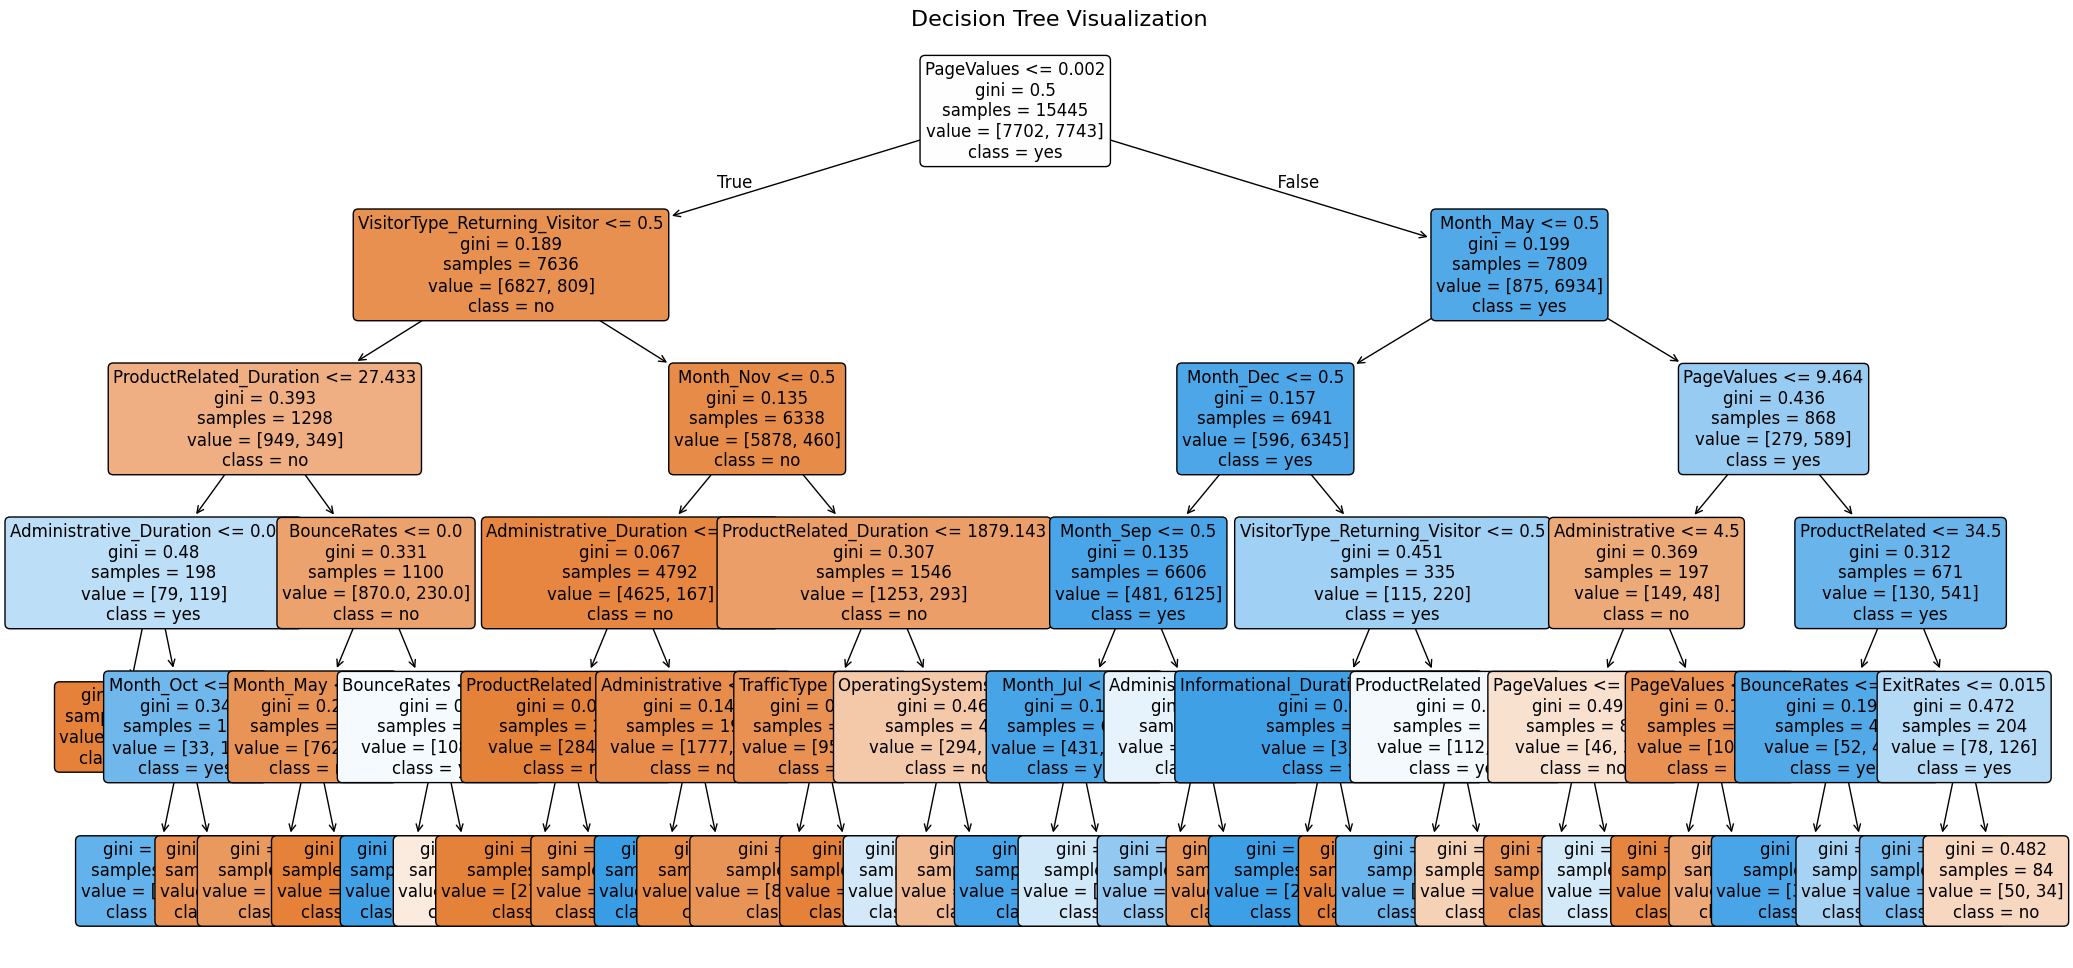

In [51]:
# Define class names and feature names
cn = ['no', 'yes']
fn = x_train.columns

# plot
plt.figure(figsize=(25, 12))
plot_tree(
    dt,
    feature_names=fn,
    class_names=cn,
    filled=True,
    rounded=True,
    fontsize=12,
    impurity=True,  # Shows Gini or entropy score in each node
    proportion=False  # Shows sample counts instead of proportions
)
plt.title('Decision Tree Visualization', fontsize=16)
plt.show()